<a href="https://colab.research.google.com/github/Jun-Liu-291/cat-dog-CNN/blob/master/cat%26dog_v6_2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
from keras.models import load_model

model = load_model('/content/drive/My Drive/dataset/cats&dogs/small_dataset/cats_and_dogs_small_f1.h5')

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator

batch_size = 40
epoch_lenth = 100
image_size = (150, 150)
train_step_per_epochs = int(2000 / batch_size)
validation_step_per_epochs = int(1000 / batch_size)

train_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/train'
validation_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from keras import optimizers
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
# change callback function
# apply ReduceLRonPlateau for changing LR
reduceLR = ReduceLROnPlateau(
    monitor="val_loss",
    factor = 0.8,
    patience = 5,
    verbose = 1,
    mode = 'min',
    min_lr = 1e-4)

# save whole model when get a better val accuracy
checkpoint = ModelCheckpoint(
    filepath = 'model.{epoch:02d}-{val_loss:.2f}.h5',
    monitor='val_acc',
    save_weights_only = False,
    save_best_only = True
)

my_callbacks = [reduceLR, checkpoint]

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=5e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_step_per_epochs,
    epochs=epoch_lenth,
    validation_data=validation_generator,
    validation_steps=validation_step_per_epochs,
    callbacks = my_callbacks
)

Epoch 1/100
 4/50 [=>............................] - ETA: 8:45 - loss: 0.4399 - acc: 0.8375

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 28 could not be retrieved. It could be because a worker has died.
  UserWarning)


23/50 [============>.................] - ETA: 5:25 - loss: 0.2896 - acc: 0.8946

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 30 could not be retrieved. It could be because a worker has died.
  UserWarning)


50/50 [==============================] - 765s 15s/step - loss: 0.2873 - acc: 0.8920 - val_loss: 0.4054 - val_acc: 0.8390
Epoch 2/100
50/50 [==============================] - 123s 2s/step - loss: 0.2678 - acc: 0.9055 - val_loss: 0.2529 - val_acc: 0.8360
Epoch 3/100
50/50 [==============================] - 124s 2s/step - loss: 0.2798 - acc: 0.9030 - val_loss: 0.7601 - val_acc: 0.8390
Epoch 4/100
50/50 [==============================] - 124s 2s/step - loss: 0.2864 - acc: 0.8965 - val_loss: 0.5025 - val_acc: 0.8470
Epoch 5/100
50/50 [==============================] - 123s 2s/step - loss: 0.2809 - acc: 0.8960 - val_loss: 0.5082 - val_acc: 0.8490
Epoch 6/100
50/50 [==============================] - 122s 2s/step - loss: 0.2818 - acc: 0.8980 - val_loss: 0.8475 - val_acc: 0.8690
Epoch 7/100
50/50 [==============================] - 121s 2s/step - loss: 0.2888 - acc: 0.8955 - val_loss: 0.2565 - val_acc: 0.8650

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
Epoch 

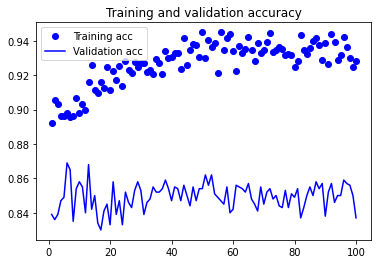

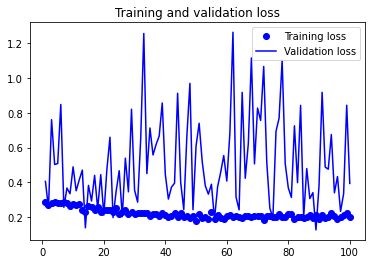

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

test1_datagen = ImageDataGenerator(rescale=1./255)

test_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/test'

test1_generator = test1_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

model.evaluate_generator(test1_generator)

Found 1000 images belonging to 2 classes.


[0.14690783619880676, 0.8479999899864197]

The results shows both training accuracy and validation accuracy is converged.

But bias and variance are both pretty big

So the model can still be improved

In [ ]:
model1 = load_model('model.06-0.85.h5')

In [ ]:
model1.evaluate_generator(test1_generator)

[0.05822206288576126, 0.8489999771118164]